In [80]:
# Importing important modules

import numpy as np
import pandas as pd
from time import sleep
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
from collections import OrderedDict
from datetime import datetime, timedelta
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException

In [107]:
userName='SAMPLE USERNAME'
Password ='SAMPLE PASSWORD'

In [82]:
# Opening the browser by giving the path of chromeDriver
driver = webdriver.Chrome(executable_path='chromedriver')

# Opening instagram Login Page
driver.get('https://www.instagram.com/accounts/login/')

# Initisalize explicit wait
wait = WebDriverWait(driver,20)

In [83]:
# Login_To_Insta() function is same as part-I. All the functionality is same as before. It is used to Login Instagram Handle
"""
Here I have visited the site and then I found the input fields where I will need to 
input the user name and the password and then I have passed the inputs with the
send key function. Once these two fields are filled with correct username and password
I just clicked on the login button which I have found using button tag then.
"""

def Login_To_Insta(userName,Password):

    try:
        
        wait.until(EC.presence_of_element_located((By.NAME,'username'))).send_keys(userName)
        wait.until(EC.presence_of_element_located((By.NAME,'password'))).send_keys(Password)
        wait.until(EC.presence_of_element_located((By.CLASS_NAME,'sqdOP'))).submit()
        wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac8f"]/button'))).click()
        wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_a9-z"]/button[2]'))).click()
        
    except TimeoutException:
        print("Something Went Wrong!")
        
# Login to Instagram
Login_To_Insta(userName,Password)

# Problem 1
```
your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
2. Now Find the number of posts these handles have done in the previous 3 days.
3. Depict this information using a suitable graph.
```

In [88]:
"""
In the above cell I have already logged in so now I have found out top 10 handles with their profile links which
will help me later to visit these user_handles after putting food in the search bar. Now I have all the profile links and we
can simply visit.
In this function I have passed search word 'food' and number of handle that I want to get that is 10 user handle. This Function
is returning a dictionary having user handle and their corresponding user links.
"""

def Search(string,n):
    User_Handle={}
    wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_acus"]/div[4]/a'))).click()
    search_input = wait.until(EC.presence_of_element_located((By.XPATH,'//input[@placeholder="Search"]')))
    search_input.clear()
    search_input.send_keys(string)
    userId = wait.until(EC.presence_of_all_elements_located((By.XPATH,'//div[@class="_abm4"]')))

    base_url = "https://instagram.com"

    # Store user handle with their handle link
    count=0
    for i in userId:
        
        if count>=n:
            break
        html_content=i.get_attribute('outerHTML')
        User_Link = BeautifulSoup(html_content,'html.parser').a['href']
        Get_User_Handle = User_Link.split('/')[1]
        if Get_User_Handle!='explore':
            User_Handle[Get_User_Handle]=base_url+User_Link
            count+=1
    
            
    return User_Handle

# Store top 10 user handle with their user links
Store_user_IDs = Search('food',10)
Store_user_IDs

{'foodtalkindia': 'https://instagram.com/foodtalkindia/',
 'food_cyclo_pedia': 'https://instagram.com/food_cyclo_pedia/',
 'food_detective_01': 'https://instagram.com/food_detective_01/',
 'foodzeee': 'https://instagram.com/foodzeee/',
 'dilsefoodie': 'https://instagram.com/dilsefoodie/',
 'pune_food_blogger': 'https://instagram.com/pune_food_blogger/',
 'food': 'https://instagram.com/food/',
 'food_love_foodie': 'https://instagram.com/food_love_foodie/',
 'germany.explores': 'https://instagram.com/germany.explores/',
 'foodfitnessnfun': 'https://instagram.com/foodfitnessnfun/'}

In [89]:
# Open the first 10 handles and find the top 5 which have the highest number of followers

"""
I have created a function named Count_Followers which takes user Id link as argument and return number of followers of that user
Firstly I got all the user's followers count and then I found the top 5 user which have highest followers among 10 user
I got the user id and their link from above created dictionary , after that I found the Top 5 user ID with their followers 
which I print below.

As of now it is showing me that foodinsider have highest followers but this can be change depending upon the user and the time 
when you will run the code.

"""

def Count_Followers(user_Handle_link):
    driver.get(user_Handle_link)
    sleep(2)
    data = wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT,'followers')))
    Follower_count = BeautifulSoup(data.get_attribute('outerHTML'),'html.parser').span['title']
    Follower_count=int(Follower_count.replace(',',''))
    return Follower_count
    
# Get followers count of 10 user and store that in dictionary
Followers_of_user = {}
for user_Id,Link in Store_user_IDs.items():
    follower = Count_Followers(Link)
    Followers_of_user[user_Id]=follower
    
# Print the top 5 user having highest followers and also store the user id for futher calculation
Top_5_handle=[]
Top_5_followed_user={}
for i in sorted(Followers_of_user.items(), key=lambda kv: kv[1],reverse=True)[:5]:
    print(i[0],'--->',i[1],'Followers')
    Top_5_followed_user[i[0]]=i[1]
    Top_5_handle.append(i[0])

foodzeee ---> 1345049 Followers
dilsefoodie ---> 1045185 Followers
foodtalkindia ---> 308756 Followers
germany.explores ---> 266028 Followers
food ---> 180309 Followers


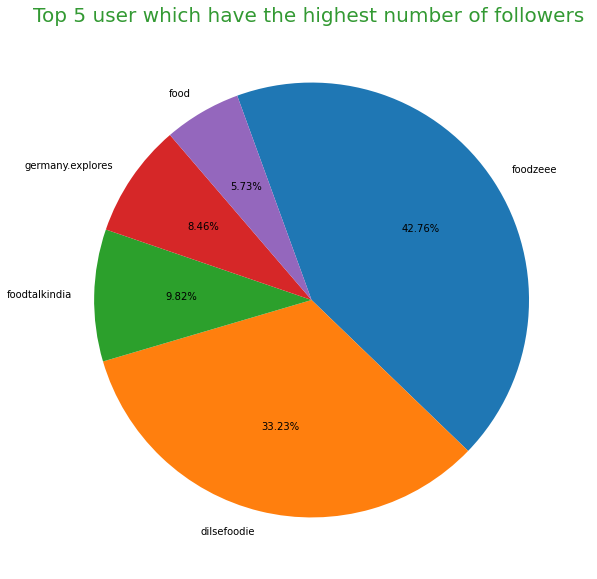

In [90]:
# Depict this information using a suitable graph.
# Pie Graph just to get the idea which user_handle has more followers.

count = list(Top_5_followed_user.values())
userId = list(Top_5_followed_user.keys())

plt.figure(figsize=(10,10))
plt.pie(count,labels=userId,autopct="%.2f%%",counterclock=False,startangle=110)
plt.title('Top 5 user which have the highest number of followers ',fontsize=20, color='green',alpha=0.8)
plt.show()

In [91]:
"""
To solve this problem I have made a function named Number_of_Post which takes two arguments: profile link and number of days from 
which I want to know the total number of post that user posted.
In this function first click on the First post then get the time and convert it into requied fomate then calculate the difference
between current datetime and post datetime if it is less then given number of days it will continue the count of post 
and go to the next post otherwise function will stop and return number of post that the user posted.

here I used the user id and its link which I found in previous answer

As of now it is showing me that healthyfood.addiction have highest posted in 3 days but this can be change depending upon
the user and the time when you will run the code.

"""

def Number_of_Post(user_url,No_of_Days):
        
    driver.get(user_url)
    sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac7v _aang"]/div[1]')))
    First_Post.click()
    no_of_post=0
    
    while True:
        time_of_post = wait.until(EC.presence_of_element_located((By.XPATH,'//time[@class="_aaqe"]'))).get_attribute('datetime')
        date_of_post = datetime.strptime(time_of_post[0:19], "%Y-%m-%dT%H:%M:%S")
        if (datetime.now() - date_of_post).days > No_of_Days :
            break
        else :
            no_of_post += 1

        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        sleep(2)

    driver.back()
    return no_of_post


# Getting the number of posts these handles have done in the previous 3 days and store them in dictionary
no_of_post_per_user = {}
for Id in Top_5_handle:
    user_url = Store_user_IDs[Id]
    Post_count = Number_of_Post(user_url,3)
    no_of_post_per_user[Id] = Post_count
    
# Print the user id and number of post have done by user in 3 days
for ID,Count in no_of_post_per_user.items():
    print(ID,'----->',Count,'Posts')

foodzeee -----> 0 Posts
dilsefoodie -----> 3 Posts
foodtalkindia -----> 4 Posts
germany.explores -----> 0 Posts
food -----> 1 Posts


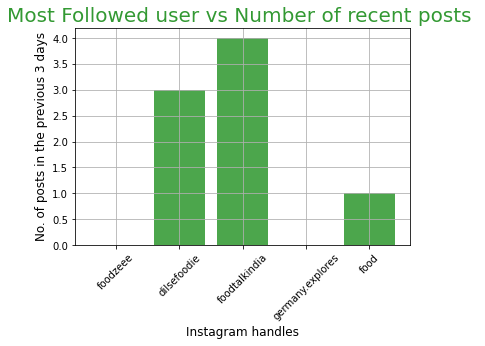

In [92]:
x = no_of_post_per_user.keys()
y = no_of_post_per_user.values()

plt.bar(x,y,color='g',alpha=0.7)
plt.ylabel("No. of posts in the previous 3 days",size=12)
plt.xlabel("Instagram handles",size=12)
plt.xticks(rotation = 45)
plt.title('Most Followed user vs Number of recent posts ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

# Problem 2 :
```
Your friend also needs a list of hashtags that he should use in his posts.
1. Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
3. Create a csv file with two columns : the word and its frequency
4. Now, find the hashtags that were most popular among these bloggers
5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
```

In [93]:
"""
To answer this question I have made a function named content_of_post it takes two arguments:
1. profile link
2. no. of post
This function is suitable for extracting the content of n number of posts and this function will return a list of 
text extracted from each post.

In this function firstly I click on the first post extract all the content and move to the next post. 
In this, my friend wants the list of Hashtags so I extract only hashtags rather than all the words, 
there is no means to extract all the words.

And I collect all the text for 10 posts corresponding to their user and store them in a dictionary key as user id and values as a list of words.

"""

def content_of_post(user_url,No_of_post):
        
    Text_list = []
    driver.get(user_url)
    sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac7v _aang"]/div[1]')))
    First_Post.click()
    no_of_post=0
    
    while True:

        HTML = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_a9zs')))
        Texts = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('a')
        
        # Get the text
        for text in Texts:
            text=text.text
            if text[0]!='@':
                Text_list.append(text)
        no_of_post += 1
        if No_of_post==no_of_post:
            break

        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        sleep(2)

    driver.back()
    
    return Text_list

# Extract all the list of text of top 5 user which I got in previous question and store them in list for further requirments
words_of_5_user = []
for Id in Top_5_handle:
    user_url = Store_user_IDs[Id]
    text_list = content_of_post(user_url,10)
    words_of_5_user.extend(text_list)
    print(Id,'--->',text_list)
    print()

foodzeee ---> ['#Vooki', '#VookiProducts', '#VookiHomeCleaning', '#VookiDishWash', '#VookiHardStain', '#DishWashCleaner', '#KitchenCleaning', '#HomeCleaning', '#HomeCleaningProducts', '#gulabjamun', '#777foods', '#dussehra', '#Navratri', '#corn', '#tandooricorn', '#butta', '#recipe', '#foodzeee', '#gotsu', '#tomato', '#pongal', '#thakkaligotsu', '#recipe', '#foodzeee', '#pulusu', '#arbi', '#recipe', '#foodzeee', '#onionbhaji', '#pakora', '#onion', '#kandabhaji', '#recipe', '#foodzeee', '#henna', '#mehndi', '#marudhani', '#foodzeee', '#vazhaikai', '#plantain', '#recipe', '#foodzeee', '#kheer', '#payasam', '#recipe', '#foodzeee', '#dumaloo', '#aloo', '#kashmiri', '#recipe', '#foodzeee']

dilsefoodie ---> ['#dilsefoodie', '#dilsecouple', '#zaatar', '#chicken', '#dilsefoodie', '#cappuccino', '#tea', '#dilsefoodie', '#dilsecouple', '#maggi', '#dilsefoodie', '#dilsecouple', '#mango', '#shakes', '#dilsefoodie', '#dilsecouple', '#kolkata', '#biryani', '#dilsefoodie', '#dilsecouple', '#pavbhaji

In [94]:
"""
Here I made a function to get the frequency of each word, In this function, it takes only one argument 
1. List of words, returns dictionary having word and corresponding frequencies
I calculate the frequency of each word and store them for further requirements I got the list of words from
previous question.

"""

def get_word_frequency(List_of_words):
    dct = {}
    words_list = []
    for word in List_of_words:
        dct[word] = dct.get(word,0) + 1
    return dct

# Calling the function
word_freq_dict = get_word_frequency(words_of_5_user)
word_freq_dict

{'#Vooki': 1,
 '#VookiProducts': 1,
 '#VookiHomeCleaning': 1,
 '#VookiDishWash': 1,
 '#VookiHardStain': 1,
 '#DishWashCleaner': 1,
 '#KitchenCleaning': 1,
 '#HomeCleaning': 1,
 '#HomeCleaningProducts': 1,
 '#gulabjamun': 1,
 '#777foods': 1,
 '#dussehra': 1,
 '#Navratri': 1,
 '#corn': 1,
 '#tandooricorn': 1,
 '#butta': 1,
 '#recipe': 7,
 '#foodzeee': 8,
 '#gotsu': 1,
 '#tomato': 1,
 '#pongal': 1,
 '#thakkaligotsu': 1,
 '#pulusu': 1,
 '#arbi': 1,
 '#onionbhaji': 1,
 '#pakora': 1,
 '#onion': 1,
 '#kandabhaji': 1,
 '#henna': 1,
 '#mehndi': 1,
 '#marudhani': 1,
 '#vazhaikai': 1,
 '#plantain': 1,
 '#kheer': 1,
 '#payasam': 1,
 '#dumaloo': 1,
 '#aloo': 2,
 '#kashmiri': 1,
 '#dilsefoodie': 10,
 '#dilsecouple': 8,
 '#zaatar': 1,
 '#chicken': 1,
 '#cappuccino': 1,
 '#tea': 1,
 '#maggi': 1,
 '#mango': 1,
 '#shakes': 1,
 '#kolkata': 2,
 '#biryani': 1,
 '#pavbhaji': 1,
 '#cheese': 1,
 '#butter': 2,
 '#poori': 1,
 '#chole': 1,
 '#Jamun': 1,
 '#diabetic': 1,
 '#food': 12,
 '#streetfood': 2,
 '#GinOCl

In [95]:
words = [ key for key,value in word_freq_dict.items()]
word_frequency = [ value for key,value in word_freq_dict.items()]

# Create a csv file with two columns : the word and its frequency
columns = {"Word":words,"Frequency":word_frequency}

# Create the pandas dataframe 
df = pd.DataFrame(columns)

# Using .to_csv pandas function to convert dataframe to csv without Index values
df.to_csv('words_frequency.csv',index=False)

# Printing the Top 10 Row of the table
df.head(10)

,Word,Frequency
0,#Vooki,1
1,#VookiProducts,1
2,#VookiHomeCleaning,1
3,#VookiDishWash,1
4,#VookiHardStain,1
5,#DishWashCleaner,1
6,#KitchenCleaning,1
7,#HomeCleaning,1
8,#HomeCleaningProducts,1
9,#gulabjamun,1


In [96]:
"""
To answer this question I have made a function that sorts the given dictionary by values
I call this function by passing the word frequency dictionary and got sorted words by frequency
Through this function I got to know that #foodies and #food is the most popular among the 5 bloggers, this can be changed over time.
"""

def sort_by_value(Dict):
    sorted_data = [[value,key] for key,value in Dict.items()]
    sorted_data.sort(reverse=True)
    return sorted_data

# Now, find the hashtags that were most popular among these bloggers
hastag_with_frequency = sort_by_value(word_freq_dict)

# Top hashtags
for i in hastag_with_frequency:
    print(i[1],'-->',i[0],'Hashtags')

#food --> 12 Hashtags
#yummy --> 10 Hashtags
#instagram --> 10 Hashtags
#instagood --> 10 Hashtags
#instafood --> 10 Hashtags
#fti --> 10 Hashtags
#foodtalkindia --> 10 Hashtags
#foodtalk --> 10 Hashtags
#foodiesofindia --> 10 Hashtags
#foodies --> 10 Hashtags
#foodie --> 10 Hashtags
#foodgram --> 10 Hashtags
#foodgasm --> 10 Hashtags
#foodfeed --> 10 Hashtags
#foodblogger --> 10 Hashtags
#discover --> 10 Hashtags
#dilsefoodie --> 10 Hashtags
#delicious --> 10 Hashtags
#germany --> 8 Hashtags
#foodzeee --> 8 Hashtags
#dilsecouple --> 8 Hashtags
#recipe --> 7 Hashtags
#germanytravel --> 7 Hashtags
#germanyscenery --> 6 Hashtags
#germanyphotography --> 6 Hashtags
#germanydaily --> 6 Hashtags
#germany_exploring --> 6 Hashtags
#foodnews --> 6 Hashtags
#hotels --> 3 Hashtags
#streetfood --> 2 Hashtags
#spookyseason --> 2 Hashtags
#spicy --> 2 Hashtags
#kolkata --> 2 Hashtags
#fall --> 2 Hashtags
#discoverhotels --> 2 Hashtags
#coffeeday --> 2 Hashtags
#coffee --> 2 Hashtags
#butter --> 2 Ha

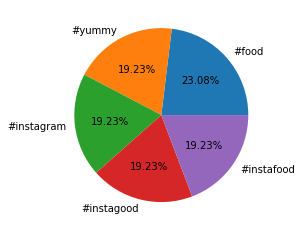

In [97]:
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
top_five_hastags = [ i[1] for i in hastag_with_frequency[:5]]
hastag_counts = [ i[0] for i in hastag_with_frequency[:5]]

# Pie graph to get the idea of which hashtag has been used for most of the time.
plt.pie(hastag_counts,labels=top_five_hastags,autopct="%.2f%%")
plt.show()

# Probem 3 :
```
You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:
1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.
2. Calculate the average likes for a handle.
3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
4. Create a bar graph to depict the above obtained information.
```

In [98]:
"""
To find Likes of the top 10 posts of handles I made a function named Likes_of_post it takes two arguments
1. profile link
2. Number of posts of which users want to know the total likes
This function is suitable for n number of posts. I put 5 handles in function one by one which I found earlier and 
find out the likes of the top 10 posts. print them
"""

def Likes_of_post(user_url,No_of_post):
        
    Totel_Likes = 0
    driver.get(user_url)
    sleep(2)
    First_Post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class="_ac7v _aang"]/div[1]')))
    First_Post.click()
    no_of_post=0
    while True:

        HTML = wait.until(EC.presence_of_element_located((By.XPATH,'//section[@class="_ae5m _ae5n _ae5o"]')))
        if len(BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('span')) == 0:
            return 0
        Likes = BeautifulSoup(HTML.get_attribute('innerHTML'),'html.parser').find_all('span')[-1]
        Likes = int(Likes.text.replace(',',''))
        Totel_Likes+=Likes
        no_of_post += 1
        if No_of_post==no_of_post:
            break

        Next_post = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]/button')))
        Next_post.click()
        sleep(2)

    driver.back()
    return Totel_Likes

In [99]:
# Iterate over top 5 user handle and put profile link in function
print("---------------------------------")
print("Total Likes for 10 Posts")
print("---------------------------------")
Total_likes_of_user = {}
for Id in Top_5_handle:
    user_url = Store_user_IDs[Id]
    Total_Likes = Likes_of_post(user_url,10)
    Total_likes_of_user[Id]=Total_Likes
    if Total_Likes == 0:
        print(Id,'--->','Likes are Hidden')
    else:
        print(Id,'--->',Total_Likes)
    print()

---------------------------------
Total Likes for 10 Posts
---------------------------------
foodzeee ---> 1307277

dilsefoodie ---> 258121

foodtalkindia ---> 5234

germany.explores ---> 23590

food --->  Likes are Hidden



In [100]:
'''
I have made a function named get_avg_likes to calculate average likes this function will take two argument
1. Total Likes per user
2. Number of Posts
'''

def get_avg_likes(Total_Likes,Number_of_Post):
    avg_likes = Total_Likes / Number_of_Post
    return avg_likes

# Calculating avarge likes for 5 handles for 10 posts and store the result in list
print("---------------------------------")
print("Average Likes")
print("---------------------------------")
average_likes_dict={}
for Id,Total_Likes in Total_likes_of_user.items():
    avg_likes = get_avg_likes(Total_Likes,10)
    average_likes_dict[Id]=avg_likes
    print(Id,'---->',format(avg_likes,'.0f'))

---------------------------------
Average Likes
---------------------------------
foodzeee ----> 130728
dilsefoodie ----> 25812
foodtalkindia ----> 523
germany.explores ----> 2359
food ----> 0


In [102]:
print("---------------------------------")
print("Ratio Avg Followers : Avg Likes")
print("---------------------------------")
avg_followers = {}
for ID in Top_5_handle:
    if average_likes_dict[ID] != 0:
        avg_followers_count = int(Top_5_followed_user[ID]/average_likes_dict[ID])
        avg_followers[ID]=avg_followers_count
        print(ID,'---->',avg_followers_count,':',int(average_likes_dict[ID]))
    else:
        print(ID,'---->','Cannot determine')

---------------------------------
Ratio Avg Followers : Avg Likes
---------------------------------
foodzeee ----> 10 : 130727
dilsefoodie ----> 40 : 25812
foodtalkindia ----> 589 : 523
germany.explores ----> 112 : 2359
food ----> Cannot determine


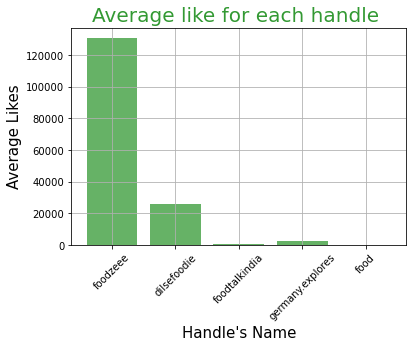

In [104]:
#Plotting Bar Graph for average likes of each handle
# For this I will use answer of problem 3.2 

username = list(average_likes_dict.keys())
avg_like = list(average_likes_dict.values())

plt.bar(username,avg_like,color='g',alpha=0.6)
plt.ylabel("Average Likes",size=15)
plt.xlabel("Handle's Name",size=15)
plt.xticks(rotation = 45)
plt.title('Average like for each handle ',fontsize=20, color='green',alpha=0.8)
plt.grid()
plt.show()

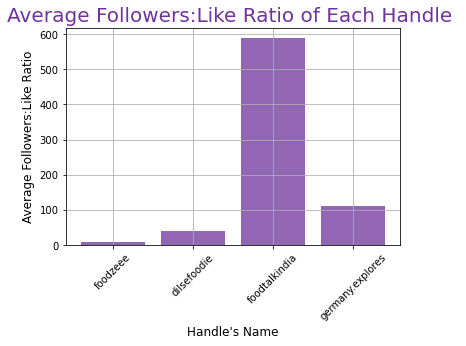

In [105]:
# Plotting Bar Graph for average followers:like ratio of each handle
# For this I will use answer of problem 3.3

username = list(avg_followers.keys())
avg_like = list(avg_followers.values())

plt.bar(username,avg_like,color='Indigo',alpha=0.6)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle's Name",size=12)
plt.xticks(rotation = 45)
plt.title('Average Followers:Like Ratio of Each Handle ',fontsize=20, color='Indigo',alpha=0.8)
plt.grid()
plt.show()

In [106]:
driver.close()